# Applying Classification Modeling
The goal of this week's assessment is to find the model which best predicts whether or not a person will default on their bank loan. In doing so, we want to utilize all of the different tools we have learned over the course: data cleaning, EDA, feature engineering/transformation, feature selection, hyperparameter tuning, and model evaluation. 


#### Data Set Information:

This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel Sorting Smoothing Method to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default. 

- NT is the abbreviation for New Taiwain. 


#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2: Gender (1 = male; 2 = female). 
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4: Marital status (1 = married; 2 = single; 3 = others). 
- X5: Age (year). 
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - etc...
    - X11 = the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17: Amount of bill statement (NT dollar). 
    - X12 = amount of bill statement in September, 2005;
    - etc...
    - X13 = amount of bill statement in August, 2005; . . .; 
    - X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - etc...
    - X23 = amount paid in April, 2005. 




You will fit three different models (KNN, Logistic Regression, and Decision Tree Classifier) to predict credit card defaults and use gridsearch to find the best hyperparameters for those models. Then you will compare the performance of those three models on a test set to find the best one.  


In [1]:
#df.rename(columns={"X1": "Consumer_and_family_credit", "X2": "Gender", "X3": "Education", "X4": "Marital_status", 
#                   "X5": "Age", "X6": "Repay_Sept", "X7": "Repay_Aug", "X8": "Repay_Jul", "X9": "Repay_Jun",
#                   "X10": "Repay_May", "X11": "Repay_Apr", "X12": "bill_state_Sept", "X13": "bill_state_Aug",
#                   "X14": "bill_state_Jul","X15": "bill_state_Jun",
#                   "X16": "bill_state_May","X17": "bill_state_Apr","X18": "amount_paid_Sept","X19": "amount_paid_Aug",
#                   "X20": "amount_paid_Jul", "X21": "amount_paid_Jun", "X22": "amount_paid_May", "X23": "amount_paid_Apr"})

## Process/Expectations

- You will be working in pairs for this assessment

### Please have ONE notebook and be prepared to explain how you worked in your pair.

1. Clean up your data set so that you can perform an EDA. 
    - This includes handling null values, categorical variables, removing unimportant columns, and removing outliers.
2. Perform EDA to identify opportunities to create new features.
    - [Great Example of EDA for classification](https://www.kaggle.com/stephaniestallworth/titanic-eda-classification-end-to-end) 
    - [Using Pairplots with Classification](https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166)
3. Engineer new features. 
    - Create polynomial and/or interaction features. 
    - Additionaly, you must also create **at least 2 new features** that are not interactions or polynomial transformations. 
        - *For example, you can create a new dummy variable that based on the value of a continuous variable (billamount6 >2000) or take the average of some past amounts.*
4. Perform some feature selection. 
    
5. You must fit **three** models to your data and tune **at least 1 hyperparameter** per model. 
6. Using the F-1 Score, evaluate how well your models perform and identify your best model.
7. Using information from your EDA process and your model(s) output provide insight as to which borrowers are more likely to deafult


In [2]:
# import libraries
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


## 1. Data Cleaning

In [3]:
df = pd.read_csv('training_data.csv', index_col=0)
df.sort_values(by='X1', ascending=False,inplace=True)
df.columns = df.iloc[0]
data = df[df.SEX != "SEX"]
data.rename(columns={"default payment next month": "default"},inplace=True)

C:\Users\All PC\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [4]:
#df = df.rename(columns={"X1": "Consumer_and_family_credit", "X2": "Gender", "X3": "Education", "X4": "Marital_status", 
#                   "X5": "Age", "X6": "Repay_Sept", "X7": "Repay_Aug", "X8": "Repay_Jul", "X9": "Repay_Jun",
#                   "X10": "Repay_May", "X11": "Repay_Apr", "X12": "bill_state_Sept", "X13": "bill_state_Aug",
#                   "X14": "bill_state_Jul","X15": "bill_state_Jun",
#                   "X16": "bill_state_May","X17": "bill_state_Apr","X18": "amount_paid_Sept","X19": "amount_paid_Aug",
#                   "X20": "amount_paid_Jul", "X21": "amount_paid_Jun", "X22": "amount_paid_May", "X23": "amount_paid_Apr"})

In [5]:
data = data.astype(float)

In [6]:
data['EDUCATION']=np.where(data['EDUCATION']>4,4,data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION']<1,4,data['EDUCATION'])

In [7]:
data['MARRIAGE']=np.where(data['MARRIAGE']<1,3,data['MARRIAGE'])


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Split data to be used in the models
# Create matrix of features
X = data.drop('default', axis = 1) # grabs everything else but 'Survived'


# Create target variable
y = data['default'] # y is the column we're trying to predict

In [10]:
data = pd.get_dummies(data, columns=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],drop_first=True)

## 2. EDA

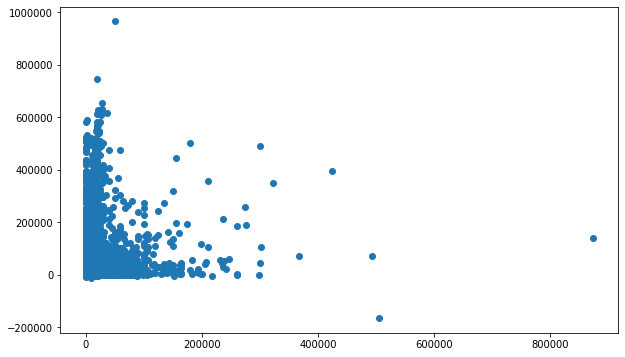

In [11]:
x = data['PAY_AMT1']
y = data['BILL_AMT1']
figure, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y);

x = data['PAY_AMT2']
y = data['LIMIT_BAL']
figure, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y);

x = data['PAY_AMT3']
y = data['LIMIT_BAL']
figure, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y);

x = data['PAY_AMT4']
y = data['LIMIT_BAL']
figure, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y);

x = data['PAY_AMT5']
y = data['LIMIT_BAL']
figure, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y);

x = data['PAY_AMT6']
y = data['LIMIT_BAL']
figure, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y);

x=data.EDUCATION
y=data.AGE
figure, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y);

x1=data.LIMIT_BAL
y1=data.EDUCATION
figure, ax = plt.subplots(figsize = (10,6))
ax.scatter(x1, y1);

x2=data.MARRIAGE
y2=data.AGE
figure, ax = plt.subplots(figsize = (10,6))
ax.scatter(x2, y2);

#X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
data['PAY_0'].value_counts()
#Maybe -2 can be paid in advance

## 3. Feature Engineering

In [12]:
#data['AMT_1'] = data.BILL_AMT1 - data.PAY_AMT1
#data['AMT_2'] = data.BILL_AMT2 - data.PAY_AMT2
#data['AMT_3'] = data.BILL_AMT3 - data.PAY_AMT3
#data['AMT_4'] = data.BILL_AMT4 - data.PAY_AMT4
#data['AMT_5'] = data.BILL_AMT5 - data.PAY_AMT5
#data['AMT_6'] = data.BILL_AMT6 - data.PAY_AMT6

## 4. Feature Selection

In [13]:
data.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default', 'SEX_2.0',
       'EDUCATION_2.0', 'EDUCATION_3.0', 'EDUCATION_4.0', 'MARRIAGE_2.0',
       'MARRIAGE_3.0', 'PAY_0_-1.0', 'PAY_0_0.0', 'PAY_0_1.0', 'PAY_0_2.0',
       'PAY_0_3.0', 'PAY_0_4.0', 'PAY_0_5.0', 'PAY_0_6.0', 'PAY_0_7.0',
       'PAY_0_8.0', 'PAY_2_-1.0', 'PAY_2_0.0', 'PAY_2_1.0', 'PAY_2_2.0',
       'PAY_2_3.0', 'PAY_2_4.0', 'PAY_2_5.0', 'PAY_2_6.0', 'PAY_2_7.0',
       'PAY_2_8.0', 'PAY_3_-1.0', 'PAY_3_0.0', 'PAY_3_1.0', 'PAY_3_2.0',
       'PAY_3_3.0', 'PAY_3_4.0', 'PAY_3_5.0', 'PAY_3_6.0', 'PAY_3_7.0',
       'PAY_3_8.0', 'PAY_4_-1.0', 'PAY_4_0.0', 'PAY_4_1.0', 'PAY_4_2.0',
       'PAY_4_3.0', 'PAY_4_4.0', 'PAY_4_5.0', 'PAY_4_6.0', 'PAY_4_7.0',
       'PAY_4_8.0', 'PAY_5_-1.0', 'PAY_5_0.0', 'PAY_5_2.0', 'PAY_5_3.0',
       'PAY_5_4.0', 'PAY_5_5.0', 'PAY_5_6.0', 'PAY_5_7.0'

In [14]:
#X = data.drop('default',axis=1)
title = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2.0',
       'EDUCATION_2.0', 'EDUCATION_3.0', 'EDUCATION_4.0', 'MARRIAGE_2.0',
       'MARRIAGE_3.0', 'PAY_0_-1.0', 'PAY_0_0.0', 'PAY_0_1.0', 'PAY_0_2.0',
       'PAY_0_3.0', 'PAY_0_4.0', 'PAY_0_5.0', 'PAY_0_6.0', 'PAY_0_7.0',
       'PAY_0_8.0', 'PAY_2_-1.0', 'PAY_2_0.0', 'PAY_2_1.0', 'PAY_2_2.0',
       'PAY_2_3.0', 'PAY_2_4.0', 'PAY_2_5.0', 'PAY_2_6.0', 'PAY_2_7.0',
       'PAY_2_8.0', 'PAY_3_-1.0', 'PAY_3_0.0', 'PAY_3_1.0', 'PAY_3_2.0',
       'PAY_3_3.0', 'PAY_3_4.0', 'PAY_3_5.0', 'PAY_3_6.0', 'PAY_3_7.0',
       'PAY_3_8.0', 'PAY_4_-1.0', 'PAY_4_0.0', 'PAY_4_1.0', 'PAY_4_2.0',
       'PAY_4_3.0', 'PAY_4_4.0', 'PAY_4_5.0', 'PAY_4_6.0', 'PAY_4_7.0',
       'PAY_4_8.0', 'PAY_5_-1.0', 'PAY_5_0.0', 'PAY_5_2.0', 'PAY_5_3.0',
       'PAY_5_4.0', 'PAY_5_5.0', 'PAY_5_6.0', 'PAY_5_7.0', 'PAY_5_8.0',
       'PAY_6_-1.0', 'PAY_6_0.0', 'PAY_6_2.0', 'PAY_6_3.0', 'PAY_6_4.0',
       'PAY_6_5.0', 'PAY_6_6.0', 'PAY_6_7.0', 'PAY_6_8.0']
X= data[title]
y=data['default']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, )

## Logistical regression without  class balancing

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, )

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22499 entries, 23626 to 10116
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LIMIT_BAL      22499 non-null  float64
 1   AGE            22499 non-null  float64
 2   BILL_AMT1      22499 non-null  float64
 3   BILL_AMT2      22499 non-null  float64
 4   BILL_AMT3      22499 non-null  float64
 5   BILL_AMT4      22499 non-null  float64
 6   BILL_AMT5      22499 non-null  float64
 7   BILL_AMT6      22499 non-null  float64
 8   PAY_AMT1       22499 non-null  float64
 9   PAY_AMT2       22499 non-null  float64
 10  PAY_AMT3       22499 non-null  float64
 11  PAY_AMT4       22499 non-null  float64
 12  PAY_AMT5       22499 non-null  float64
 13  PAY_AMT6       22499 non-null  float64
 14  default        22499 non-null  float64
 15  SEX_2.0        22499 non-null  uint8  
 16  EDUCATION_2.0  22499 non-null  uint8  
 17  EDUCATION_3.0  22499 non-null  uint8  
 18  EDUCATI

## Prepping data for hangling class imbalances

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, )

In [18]:
training = pd.concat([X_train,y_train],axis=1)
testing = pd.concat([X_test,y_test],axis=1)

In [19]:
not_defaulted_training = training[training.default==0]
defaulted_training = training[training.default==1]
print('not_defaulted count training: '+ str(len(not_defaulted_training)))
print('defaulted count training: '+ str(len(defaulted_training)))

not_defaulted count training: 13945
defaulted count training: 4054


In [20]:
not_defaulted_testing = testing[testing.default==0]
defaulted_testing = testing[testing.default==1]
print('not_defaulted count training: '+ str(len(not_defaulted_testing)))
print('defaulted count training: '+ str(len(defaulted_testing)))

not_defaulted count training: 3526
defaulted count training: 974


## Upsampling

In [21]:
from sklearn.utils import resample
default_upsampled_training = resample(defaulted_training,
                          replace=True, # sample with replacement
                          n_samples=len(not_defaulted_training), # match number in majority class
                          random_state=23) # reproducible results

In [22]:
default_upsampled_testing = resample(defaulted_testing,
                          replace=True, # sample with replacement
                          n_samples=len(not_defaulted_testing), # match number in majority class
                          random_state=23) # reproducible results

In [23]:
upsampled_training = pd.concat([not_defaulted_training, default_upsampled_training])
upsampled_training.default.value_counts()

1.0    13945
0.0    13945
Name: default, dtype: int64

In [24]:
upsampled_testing = pd.concat([not_defaulted_testing, default_upsampled_testing])
upsampled_testing.default.value_counts()

1.0    3526
0.0    3526
Name: default, dtype: int64

## Upsampled logistical regression

In [25]:
y_train_upsampled = upsampled_training.default
X_train_upsampled = upsampled_training.drop('default', axis=1)

In [26]:
y_test_upsampled = upsampled_testing.default
X_test_upsampled = upsampled_testing.drop('default', axis=1)

In [27]:
upsampled_lr_train = LogisticRegression(solver='liblinear')
upsampled_lr_train.fit(X_train_upsampled, y_train_upsampled)
upsampled_pred_train = upsampled_lr_train.predict(X_train_upsampled)
print('Training Accuracy score: ', accuracy_score(y_train_upsampled, upsampled_pred_train))
# checking accuracy
print('Traning F1 score: ', f1_score(y_train_upsampled, upsampled_pred_train))

Training Accuracy score:  0.6984940839010398
Traning F1 score:  0.6554676936944319


In [28]:
upsampled_lr_test = LogisticRegression(solver='liblinear')
upsampled_lr_test.fit(X_test_upsampled, y_test_upsampled)
upsampled_pred_test = upsampled_lr_test.predict(X_test_upsampled)
print('Testing Accuracy score: ', accuracy_score(y_test_upsampled, upsampled_pred_test))
# checking accuracy
print('Testing F1 score: ', f1_score(y_test_upsampled, upsampled_pred_test))

Testing Accuracy score:  0.702921157118548
Testing F1 score:  0.6811748592299497


## Upsampled KNN classification

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
#scaler.fit(X_train_upsampled)
#X_train = scaler.transform(X_train_upsampled)  
#X_test = scaler.transform(X_test_upsampled)  

In [30]:
def max_value(l):
    max_val = max(l)
    max_idx = l.index(max_val)
    return max_idx, max_val

In [31]:
#create a container to track the scores
k_scores=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(1, 21))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #fit the model and get the score on a evaluation metric
    knn.fit(X_train_upsampled, y_train_upsampled)
    y_pred = knn.predict(X_test_upsampled)
    
    acc = metrics.accuracy_score(y_test_upsampled, y_pred)
    
    k_scores.append(acc)

#use the max_value function to find the K value that gives you the best accuracy pred 
idx, val = max_value(k_scores)
    
print(idx+1, val)

19 0.5910380034032898


In [32]:
f1_score(y_test_upsampled, y_pred)

0.5478814216979667

## Down sampling

In [33]:
# downsample majority
default_downsampled_training = resample(not_defaulted_training,
                                replace = False, # sample without replacement
                                n_samples = len(defaulted_training), # match minority n
                                random_state = 23) # reproducible results

In [34]:
default_downsampled_testing = resample(not_defaulted_testing,
                          replace=False, # sample with replacement
                          n_samples=len(defaulted_testing), # match number in majority class
                          random_state=23) # reproducible results

In [35]:
downsampled_training = pd.concat([default_downsampled_training, defaulted_training])
downsampled_training.default.value_counts()

1.0    4054
0.0    4054
Name: default, dtype: int64

In [36]:
downsampled_testing = pd.concat([default_downsampled_testing, defaulted_testing])
downsampled_testing.default.value_counts()

1.0    974
0.0    974
Name: default, dtype: int64

In [37]:
y_train_down = downsampled_training.default
X_train_down = downsampled_training.drop('default', axis=1)
downsampled_lr_train = LogisticRegression(solver='liblinear')
downsampled_lr_train.fit(X_train_down, y_train_down)
downsampled_pred_train = downsampled_lr_train.predict(X_train_down)
print('Test Accuracy score: ', accuracy_score(y_train_down, downsampled_pred_train))
print('Test F1 score: ', f1_score(y_train_down, downsampled_pred_train))

Test Accuracy score:  0.693759250123335
Test F1 score:  0.6663979578127099


In [38]:
y_test_down = downsampled_testing.default
X_test_down = downsampled_testing.drop('default', axis=1)
downsampled_lr_test = LogisticRegression(solver='liblinear')
downsampled_lr_test.fit(X_test_down, y_test_down)
downsampled_pred_test = downsampled_lr_test.predict(X_test_down)
print('Test Accuracy score: ', accuracy_score(y_test_down, downsampled_pred_test))
print('Test F1 score: ', f1_score(y_test_down, downsampled_pred_test))

Test Accuracy score:  0.721252566735113
Test F1 score:  0.6826417299824664


## Down Sampling KNN Classification 

In [39]:
#create a container to track the scores
k_scores=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(1, 21))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #fit the model and get the score on a evaluation metric
    knn.fit(X_train_down, y_train_down)
    y_pred = knn.predict(X_test_down)
    
    acc = metrics.accuracy_score(y_test_down, y_pred)
    
    k_scores.append(acc)

#use the max_value function to find the K value that gives you the best accuracy pred 
idx, val = max_value(k_scores)
    
print(idx+1, val)

19 0.6031827515400411


## SMOTE

In [40]:
X = data.drop('default',axis=1)
y=data['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23, )
sm = SMOTE(sampling_strategy='minority', random_state=23)
X_train, y_train = sm.fit_sample(X_train, y_train)
lr = LogisticRegression(solver='liblinear')
smote_lr = LogisticRegression(solver='liblinear')
smote_lr.fit(X_train, y_train)
smote_pred = smote_lr.predict(X_test)
print('Test Accuracy score: ', accuracy_score(y_test, smote_pred))
print('Test F1 score: ', f1_score(y_test, smote_pred))

Test Accuracy score:  0.5594666666666667
Test F1 score:  0.4242565055762082


## TomeLinks

In [41]:
X = data.drop('default',axis=1)
y=data['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=23)
#tl = TomekLinks()
#X_res, y_res = tl.fit_resample(X_train, y_train)
#print('Resampled dataset shape %s' % Counter(y_res))

In [42]:
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_sample(X_train, y_train)
tomek_lr = LogisticRegression(solver='liblinear')
tomek_lr.fit(X_resampled, y_resampled)
tomek_pred = tomek_lr.predict(X_test)
print('Test Accuracy score: ', accuracy_score(y_test, tomek_pred))
print('Test F1 score: ', f1_score(y_test, tomek_pred))

Test Accuracy score:  0.7835555555555556
Test F1 score:  0.0


## Penalize Algorithms

In [43]:
X = data.drop('default',axis=1)
y=data['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, )

In [44]:
lr_clf_weighted = LogisticRegression(solver='liblinear', class_weight='balanced')
lr_clf_weighted.fit(X_train, y_train)
y_weighted_test = lr_clf_weighted.predict(X_test)
print('Test Accuracy score: ', accuracy_score(y_test, y_weighted_test))
print('Test F1 score: ', f1_score(y_test, y_weighted_test))

Test Accuracy score:  0.5568888888888889
Test F1 score:  0.41899766899766905


## Decision Trees

In [45]:
X = data.drop('default',axis=1)
y=data['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, )

In [46]:
# Instantiate the classifier using 200 trees
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 23, n_estimators=200)

In [47]:
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print('Test Accuracy score: ', accuracy_score(y_test, rfc_pred))
print('Test F1 score: ', f1_score(y_test, rfc_pred))

Test Accuracy score:  0.8226666666666667
Test F1 score:  0.48114434330299094


In [48]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))


Accuracy:0.736


In [50]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred_class)
classes = ['defaulted', 'notdefaulted']
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[2907  619]
 [ 569  405]]


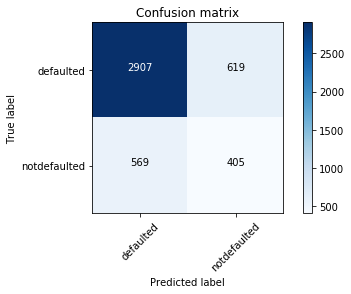

In [51]:
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [52]:
data.default.value_counts()

0.0    17471
1.0     5028
Name: default, dtype: int64

In [53]:
3609 + 741

4350

In [54]:
773 +502

1275

## 5. Model Fitting and Hyperparameter Tuning
KNN, Logistic Regression, Decision Tree

## 6. Model Evaluation

## 7. Final Model